In [20]:
import pymc as pm
import netCDF4 as nc
import numpy as np
import aesara
import aesara.tensor as at
import arviz as az
import matplotlib.pyplot as plt


events = ["GW150914","GW170104","GW170823","GW190519_153544",
          "GW190521","GW190521_074359","GW190706_222641",
          "GW190828_063405","GW200224_222234","GW200311_115853"]

ds = {}
points_charged = {}
points_uncharged = {}

for event in events:
    fn = f"./ChargedResults/{event}/{event}-charged-posteriors.nc"
    a = nc.Dataset(fn)
    ds[event] = a
    points_charged[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['Q_charge'][:].flatten())])
    
for event in events:
    fn = f"./ChargedResults/{event}/{event}-posteriors.nc"
    a = nc.Dataset(fn)
    ds[event] = a
    points_uncharged[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['M'][:].flatten())])

#events_that_look_alright = ['GW150914','GW190519_153544',
#                            'GW190521','GW190521_074359',
#                            'GW190706_222641','GW200224_222234']

#n_events = len(events_that_look_alright)

#points_good = {k:v for k,v in points.items() if k in events_that_look_alright}

def axplot_chiQ(ax,points, gridsize=20, labels=[r"$\chi$", r"$Q$"], **kwargs):
    ax.hexbin(points[:,0],points[:,1],gridsize=gridsize, extent=(0,1,0,1), **kwargs)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
    ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
    return ax

def axplot_chiM(ax,points, gridsize=20, labels=[r"$\chi$", r"$M$"], **kwargs):
    ax.hexbin(points[:,0],points[:,1],gridsize=gridsize, extent=(0,1,points[:,1].min(),points[:,1].max()), **kwargs)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    return ax

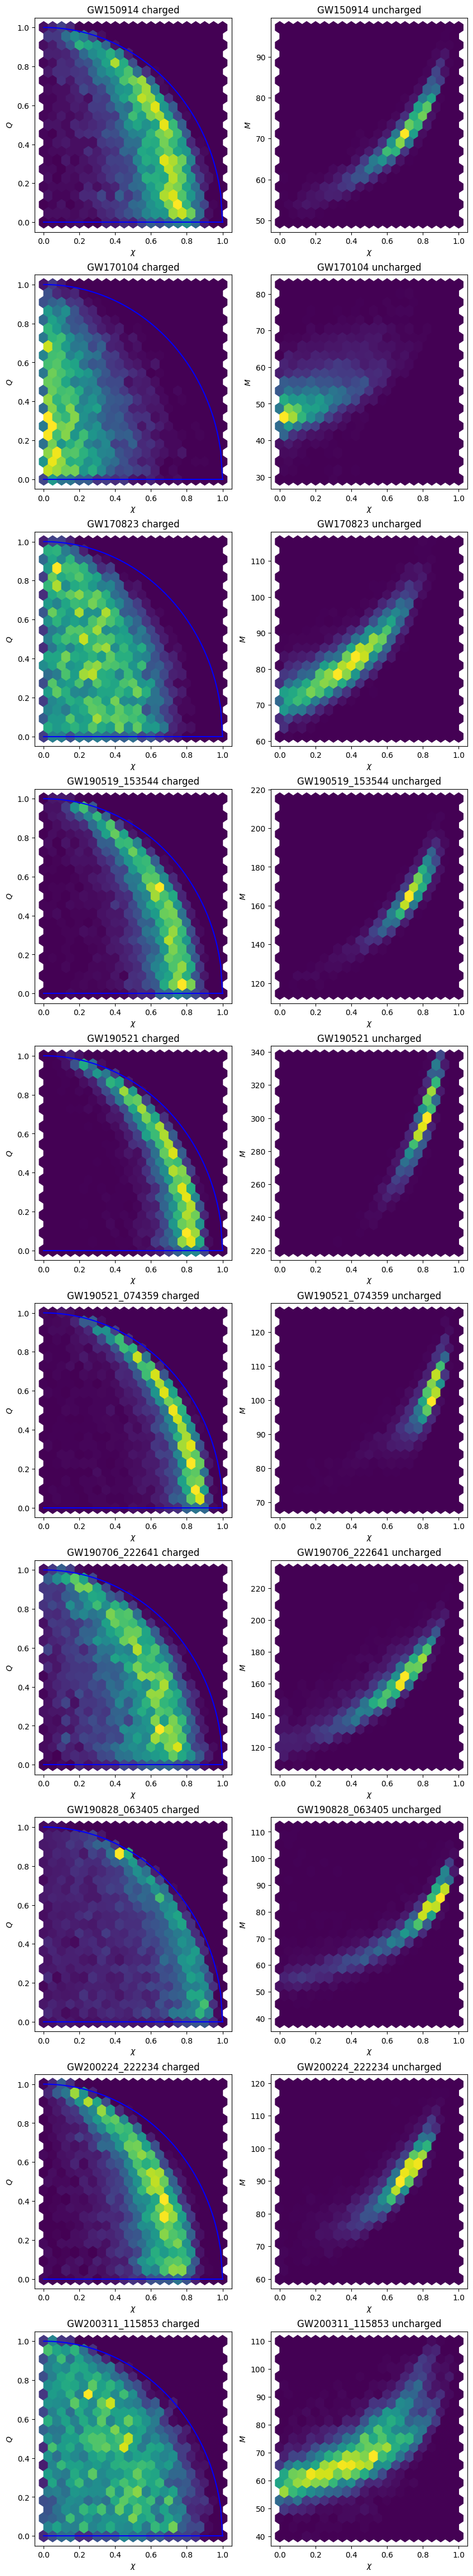

In [21]:
#fig, ax = plt.subplots(1, figsize=(5,5))
fig, axes = plt.subplots(nrows=len(points_uncharged), ncols=2, figsize = ((10,len(points_uncharged)*6)), dpi=100)

for i, eventname in enumerate(points_uncharged.keys()):
    axes[i,0] = axplot_chiQ(axes[i,0], points_charged[eventname])
    axes[i,0].set_title(eventname + " charged")
    axes[i,1] = axplot_chiM(axes[i,1], points_uncharged[eventname])
    axes[i,1].set_title(eventname + " uncharged")

plt.show()

In [7]:
a['posterior']['chi'][:].flatten()

masked_array(data=[0.6672875 , 0.57916869, 0.58414878, ..., 0.31745768,
                   0.51355465, 0.04524802],
             mask=False,
       fill_value=1e+20)